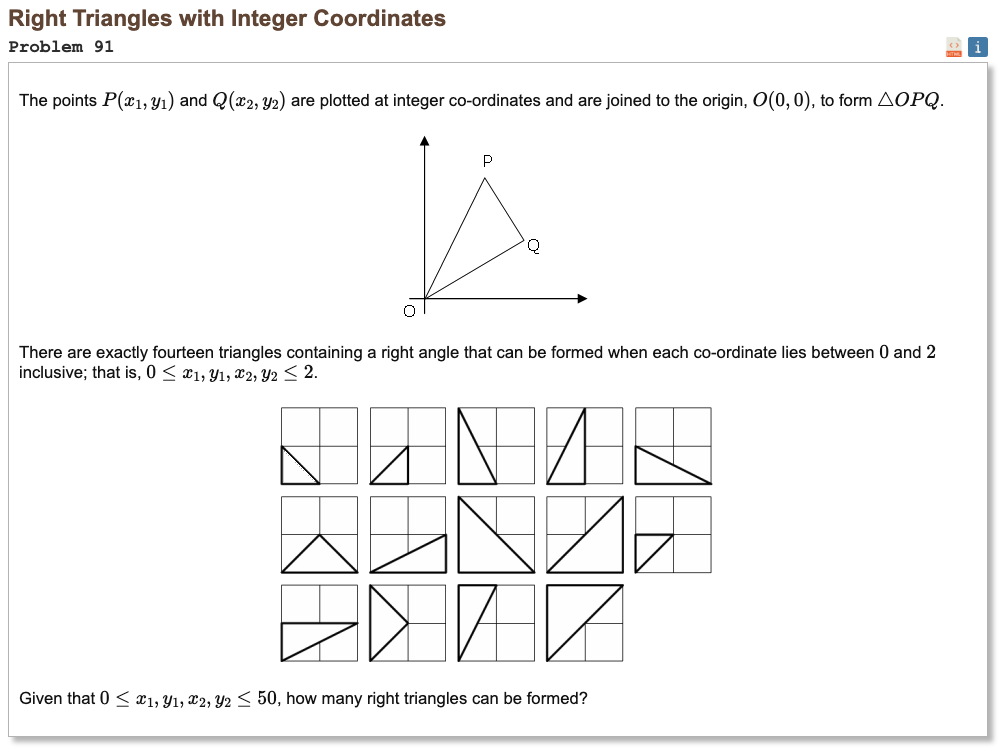

## Initial approach

* First, simulate the example for "≤" case
* list all coordinates  
  
0,0  
0,1  
0,2  
1,0  
1,1  
1,2  
2,0  
2,1  
2,2    
  
* we need 3 points in different coordinates
* cases shall be repeated, so avoid it

In [1]:
points = list()
for i in range(0,3):
    for k in range(0,3):
        points.append((i,k))

print(points)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


Define exceptions:  

* 3 points must be in different coordinates
* 3 points cannot be in a line
* one point will be always (0,0)

How do we define a line in this case?

* (0,0), (1,0), (2,0)
* (0,0), (0,1), (0,2)

so, if one axis doesn't change, then it is a line.

In [2]:
from itertools import combinations

points = [(x, y) for x in range(3) for y in range(3)]
origin = (0, 0)
valid_triangles = []

def are_collinear(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    return (y2 - y1)*(x3 - x1) == (y3 - y1)*(x2 - x1)

for a, b in combinations(points, 2):
    if origin in (a, b):
        continue
    if origin == a or origin == b or a == b:
        continue
    if are_collinear(origin, a, b):
        continue
    valid_triangles.append((origin, a, b))

print(valid_triangles)
print("Valid triangle count:", len(valid_triangles))

[((0, 0), (0, 1), (1, 0)), ((0, 0), (0, 1), (1, 1)), ((0, 0), (0, 1), (1, 2)), ((0, 0), (0, 1), (2, 0)), ((0, 0), (0, 1), (2, 1)), ((0, 0), (0, 1), (2, 2)), ((0, 0), (0, 2), (1, 0)), ((0, 0), (0, 2), (1, 1)), ((0, 0), (0, 2), (1, 2)), ((0, 0), (0, 2), (2, 0)), ((0, 0), (0, 2), (2, 1)), ((0, 0), (0, 2), (2, 2)), ((0, 0), (1, 0), (1, 1)), ((0, 0), (1, 0), (1, 2)), ((0, 0), (1, 0), (2, 1)), ((0, 0), (1, 0), (2, 2)), ((0, 0), (1, 1), (1, 2)), ((0, 0), (1, 1), (2, 0)), ((0, 0), (1, 1), (2, 1)), ((0, 0), (1, 2), (2, 0)), ((0, 0), (1, 2), (2, 1)), ((0, 0), (1, 2), (2, 2)), ((0, 0), (2, 0), (2, 1)), ((0, 0), (2, 0), (2, 2)), ((0, 0), (2, 1), (2, 2))]
Valid triangle count: 25


Another limitation: triangle must be right triangle.  

* so one angle must be 90 degrees
* we can use pythagorean theorem to check

In [3]:
points = [(x, y) for x in range(3) for y in range(3) if (x, y) != (0, 0)]
valid_triangles = []

def dist2(p1, p2):
    return (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2

def is_right_triangle(o, a, b):
    d1 = dist2(o, a)
    d2 = dist2(o, b)
    d3 = dist2(a, b)
    sides = sorted([d1, d2, d3])
    return sides[0] + sides[1] == sides[2]

for a, b in combinations(points, 2):
    if is_right_triangle(origin, a, b):
        valid_triangles.append((origin, a, b))

print(valid_triangles)
print("Valid triangle count:", len(valid_triangles))

[((0, 0), (0, 1), (1, 0)), ((0, 0), (0, 1), (1, 1)), ((0, 0), (0, 1), (2, 0)), ((0, 0), (0, 1), (2, 1)), ((0, 0), (0, 2), (1, 0)), ((0, 0), (0, 2), (1, 1)), ((0, 0), (0, 2), (1, 2)), ((0, 0), (0, 2), (2, 0)), ((0, 0), (0, 2), (2, 2)), ((0, 0), (1, 0), (1, 1)), ((0, 0), (1, 0), (1, 2)), ((0, 0), (1, 1), (2, 0)), ((0, 0), (2, 0), (2, 1)), ((0, 0), (2, 0), (2, 2))]
Valid triangle count: 14


* Good, 14 is correct. Now try 51 x 51 grid.

In [4]:
from itertools import combinations

points = [(x, y) for x in range(51) for y in range(51) if (x, y) != (0, 0)]
origin = (0, 0)
count = 0

def dist2(p1, p2):
    return (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2

def is_right_triangle(o, a, b):
    d1 = dist2(o, a)
    d2 = dist2(o, b)
    d3 = dist2(a, b)
    sides = sorted([d1, d2, d3])
    return sides[0] + sides[1] == sides[2]

for a, b in combinations(points, 2):
    if is_right_triangle(origin, a, b):
        count += 1

print("Result for 51x51 grid:", count)

Result for 51x51 grid: 14234
